In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Change directory
os.chdir(r"C:\Users\Matome.Molokome\Desktop\Unisa\2021\HRCOS82 Research\favorita-grocery-sales-forecasting")

start_time = time.time()
chunk = pd.read_csv('train.csv',dtype={"id": object, "date": object,"store_nbr": object,"item_nbr": object,
                                         "unit_sales": float, "onpromotion": object
                                        },chunksize=1000000)


df = pd.concat(chunk)

end_time = time.time()

print ("Completed in",(end_time-start_time))


#df.sample(10)

Completed in 535.8917353153229


In [3]:
df.sample(10)
df.dtypes

id              object
date            object
store_nbr       object
item_nbr        object
unit_sales     float64
onpromotion     object
dtype: object

In [2]:
stores = pd.read_csv('stores.csv',dtype={"store_nbr": object})

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
stores ['type_numeric'] = labelencoder.fit_transform(stores ['type'])
stores ['city_numeric'] = labelencoder.fit_transform(stores ['city'])
stores ['state_numeric'] = labelencoder.fit_transform(stores ['state'])
stores

,store_nbr,city,state,type,cluster,type_numeric,city_numeric,state_numeric
0,1,Quito,Pichincha,D,13,3,18,12
1,2,Quito,Pichincha,D,13,3,18,12
2,3,Quito,Pichincha,D,8,3,18,12
3,4,Quito,Pichincha,D,9,3,18,12
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,3,21,14
5,6,Quito,Pichincha,D,13,3,18,12
6,7,Quito,Pichincha,D,8,3,18,12
7,8,Quito,Pichincha,D,8,3,18,12
8,9,Quito,Pichincha,B,6,1,18,12
9,10,Quito,Pichincha,C,15,2,18,12


In [5]:
oil = pd.read_csv('oil.csv')
print(oil)
oil.dtypes


            date  dcoilwtico
0     2013-01-01         NaN
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
5     2013-01-08       93.21
6     2013-01-09       93.08
7     2013-01-10       93.81
8     2013-01-11       93.60
9     2013-01-14       94.27
10    2013-01-15       93.26
11    2013-01-16       94.28
12    2013-01-17       95.49
13    2013-01-18       95.61
14    2013-01-21         NaN
15    2013-01-22       96.09
16    2013-01-23       95.06
17    2013-01-24       95.35
18    2013-01-25       95.15
19    2013-01-28       95.95
20    2013-01-29       97.62
21    2013-01-30       97.98
22    2013-01-31       97.65
23    2013-02-01       97.46
24    2013-02-04       96.21
25    2013-02-05       96.68
26    2013-02-06       96.44
27    2013-02-07       95.84
28    2013-02-08       95.71
29    2013-02-11       97.01
...          ...         ...
1188  2017-07-21       45.78
1189  2017-07-24       46.21
1190  2017-07-

date           object
dcoilwtico    float64
dtype: object

In [6]:
#Save  to CSV
oil.sample(10).to_csv('oils.csv', index=False)

In [4]:
items = pd.read_csv('items.csv',dtype={"item_nbr": object})
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
items ['family_numeric'] = labelencoder.fit_transform(items ['family'])
print(items)
items.dtypes


     item_nbr            family  class  perishable  family_numeric
0       96995         GROCERY I   1093           0              12
1       99197         GROCERY I   1067           0              12
2      103501          CLEANING   3008           0               7
3      103520         GROCERY I   1028           0              12
4      103665      BREAD/BAKERY   2712           1               5
5      105574         GROCERY I   1045           0              12
6      105575         GROCERY I   1045           0              12
7      105576         GROCERY I   1045           0              12
8      105577         GROCERY I   1045           0              12
9      105693         GROCERY I   1034           0              12
10     105737         GROCERY I   1044           0              12
11     105857         GROCERY I   1092           0              12
12     106716         GROCERY I   1032           0              12
13     108079         GROCERY I   1030           0            

item_nbr          object
family            object
class              int64
perishable         int64
family_numeric     int32
dtype: object

In [19]:
#Save  to CSV
items.sample(10).to_csv('itemscoded.csv', index=False)

In [5]:
transactions = pd.read_csv('transactions.csv', dtype={"store_nbr": object})
print(transactions)
transactions.dtypes

             date store_nbr  transactions
0      2013-01-01        25           770
1      2013-01-02         1          2111
2      2013-01-02         2          2358
3      2013-01-02         3          3487
4      2013-01-02         4          1922
5      2013-01-02         5          1903
6      2013-01-02         6          2143
7      2013-01-02         7          1874
8      2013-01-02         8          3250
9      2013-01-02         9          2940
10     2013-01-02        10          1293
11     2013-01-02        11          3547
12     2013-01-02        12          1362
13     2013-01-02        13          1102
14     2013-01-02        14          2002
15     2013-01-02        15          1622
16     2013-01-02        16          1167
17     2013-01-02        17          1580
18     2013-01-02        18          1635
19     2013-01-02        19          1369
20     2013-01-02        23          1381
21     2013-01-02        24          2605
22     2013-01-02        25       

date            object
store_nbr       object
transactions     int64
dtype: object

In [6]:
holidays_events = pd.read_csv('holidays_events.csv')
holidays_events ['Holiday'] = '1'
print(holidays_events)
holidays_events.dtypes

           date        type    locale                     locale_name  \
0    2012-03-02     Holiday     Local                           Manta   
1    2012-04-01     Holiday  Regional                        Cotopaxi   
2    2012-04-12     Holiday     Local                          Cuenca   
3    2012-04-14     Holiday     Local                        Libertad   
4    2012-04-21     Holiday     Local                        Riobamba   
5    2012-05-12     Holiday     Local                            Puyo   
6    2012-06-23     Holiday     Local                        Guaranda   
7    2012-06-25     Holiday  Regional                        Imbabura   
8    2012-06-25     Holiday     Local                       Latacunga   
9    2012-06-25     Holiday     Local                         Machala   
10   2012-07-03     Holiday     Local                   Santo Domingo   
11   2012-07-03     Holiday     Local                       El Carmen   
12   2012-07-23     Holiday     Local              

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
Holiday        object
dtype: object

In [8]:

df.describe()



KeyError: MemoryError((5, 125497040), dtype('O'))

In [ ]:
df.isnull().sum()

In [ ]:
df[df.isnull().any(axis=1)]

In [21]:
#Filter Dataset
traindata = df[df.date >= '2017-08-01']
traindata.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64

In [22]:
#Encoding

#Dictionary
encoding_nums = {"onpromotion":     {"True": 1, "False": 0}}

#FindandReplace
traindata = traindata.replace(encoding_nums)

In [23]:
traindata.sample(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
125085516,125085516,2017-08-12,3,1239809,8.0,0
123966666,123966666,2017-08-01,21,1317096,5.0,0
124004130,124004130,2017-08-01,41,2016738,2.0,0
125016142,125016142,2017-08-11,23,849080,3.0,0
124872443,124872443,2017-08-09,52,1014864,2.0,0
124663762,124663762,2017-08-07,49,1686663,9.0,0
124285671,124285671,2017-08-04,22,1386506,1.0,0
124995929,124995929,2017-08-11,10,1489868,3.0,0
124522968,124522968,2017-08-06,33,1905639,1.0,0
124599801,124599801,2017-08-07,15,1460019,1.0,0


In [12]:
traindata.dtypes

id              object
date            object
store_nbr       object
item_nbr        object
unit_sales     float64
onpromotion      int64
dtype: object

In [24]:
#Join Dimensions
traindata = pd.merge(traindata, items, on='item_nbr', how='left')
traindata = pd.merge(traindata, stores , on='store_nbr', how='left')
traindata = pd.merge(traindata, holidays_events , on='date', how='left')
traindata = pd.merge(traindata, oil , on='date', how='left')
traindata = pd.merge(traindata, transactions , on= ['date','store_nbr'], how='left')


traindata.sample(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,family_numeric,...,city_numeric,state_numeric,type_y,locale,locale_name,description,transferred,Holiday,dcoilwtico,transactions
1488409,125414481,2017-08-15,10,953404,1.0,0,CLEANING,3046,0,7,...,18,12,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,47.57,1010
825992,124752064,2017-08-08,44,1430040,132.0,0,BEVERAGES,1120,0,3,...,18,12,NaN,NaN,NaN,NaN,NaN,NaN,49.07,3690
1049924,124975996,2017-08-11,1,764439,2.0,0,GROCERY I,1072,0,12,...,18,12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,1,48.81,570
1089771,125015843,2017-08-11,23,414623,4.0,0,GROCERY I,1016,0,12,...,0,15,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,1,48.81,955
1112584,125038656,2017-08-11,36,1354711,46.0,0,GROCERY I,1016,0,12,...,11,6,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,1,48.81,1252
229358,124155430,2017-08-03,6,1988754,12.0,0,PRODUCE,2032,1,30,...,18,12,NaN,NaN,NaN,NaN,NaN,NaN,49.03,1639
1500192,125426264,2017-08-15,18,315279,2.0,0,GROCERY I,1040,0,12,...,18,12,Holiday,Local,Riobamba,Fundacion de Riobamba,False,1,47.57,1343
88354,124014426,2017-08-01,46,509872,9.0,0,GROCERY I,1086,0,12,...,18,12,NaN,NaN,NaN,NaN,NaN,NaN,49.19,3458
419495,124345567,2017-08-04,52,1913604,3.0,0,PERSONAL CARE,4118,0,25,...,14,10,NaN,NaN,NaN,NaN,NaN,NaN,49.57,2442
1294898,125220970,2017-08-13,20,577740,2.0,0,GROCERY I,1032,0,12,...,18,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1834


In [25]:
#drop columns
traindata.drop(['id', 'family','type_y','locale','locale_name','description','transferred','state','city','type_x'],
               axis=1,inplace=True)
traindata.sample(10)


,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
664162,2017-08-07,9,1430081,1.0,0,6258,0,15,6,1,18,12,NaN,49.37,2200
124333,2017-08-02,7,1173853,4.0,0,1040,0,12,8,3,18,12,NaN,49.60,1849
1135929,2017-08-11,47,683721,2.0,0,1062,0,12,14,0,18,12,1,48.81,4009
271221,2017-08-03,31,559873,17.0,1,1072,0,12,10,1,1,9,NaN,49.03,1410
1097382,2017-08-11,27,619969,3.0,0,1014,0,12,1,3,4,6,1,48.81,1936
173232,2017-08-02,35,1464086,72.0,0,1144,0,3,3,2,15,6,NaN,49.60,694
988534,2017-08-10,22,413987,2.0,0,3034,0,7,7,2,16,11,1,48.54,730
1289483,2017-08-13,17,405304,3.0,0,1032,0,12,12,2,18,12,NaN,NaN,1563
1129930,2017-08-11,45,315221,18.0,0,1014,0,12,11,0,18,12,1,48.81,4302
1318991,2017-08-13,33,1463800,1.0,0,1118,0,3,3,2,17,9,NaN,NaN,867


In [36]:
#Save  to CSV
traindata.sample(10).to_csv('mergedd.csv', index=False)

In [ ]:
traindata.isnull().sum()

In [26]:
#Cleaning data 

#replace NAN with zero
traindata['Holiday'] = traindata['Holiday'].fillna(0)




In [27]:
traindata.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
590404,2017-08-06,29,1457201,3.0,0,3108,0,18,10,4,8,6,0,NaN,1549
883654,2017-08-09,19,949296,2.0,0,3020,0,7,15,2,7,1,0,49.59,1120
1438396,2017-08-14,42,269084,6.0,0,2720,1,5,2,3,3,0,0,47.59,1027
778399,2017-08-08,16,2047752,4.0,0,3034,0,7,3,2,21,14,0,49.07,653
1134877,2017-08-11,46,1974848,3.0,1,2504,1,10,14,0,18,12,1,48.81,3814
1490308,2017-08-15,11,1239785,12.0,0,2174,1,8,6,1,2,12,1,47.57,2360
470577,2017-08-05,24,1971255,2.0,0,1124,0,3,1,3,8,6,1,NaN,2276
347950,2017-08-04,15,1239795,1.0,0,2162,1,8,15,2,9,7,0,49.57,1352
404941,2017-08-04,47,373152,28.0,0,4114,0,25,14,0,18,12,0,49.57,4010
236525,2017-08-03,10,214862,1.0,0,3034,0,7,15,2,18,12,0,49.03,916


In [28]:
#Cleaning data 
#replace NAN with mean
dcoilwtico_mean =traindata['dcoilwtico'].mean()
traindata['dcoilwtico'] = traindata['dcoilwtico'].fillna(dcoilwtico_mean)

In [29]:
#Check negative sales
traindata[traindata['unit_sales'] < 0]

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
5587,2017-08-01,3,1164923,-29.000,0,1132,0,3,8,3,18,12,0,49.190000,3066
5611,2017-08-01,3,1177984,-2.000,0,1002,0,12,8,3,18,12,0,49.190000,3066
21967,2017-08-01,10,1990061,-7.000,0,1144,0,3,15,2,18,12,0,49.190000,984
59830,2017-08-01,31,2011328,-36.000,0,1072,0,12,10,1,1,9,0,49.190000,1570
76543,2017-08-01,41,568133,-3.000,0,1122,0,3,4,3,13,4,0,49.190000,1178
76976,2017-08-01,41,1047681,-4.000,0,1120,0,3,4,3,13,4,0,49.190000,1178
97564,2017-08-01,49,1397067,-1.000,0,3032,0,7,11,0,18,12,0,49.190000,3034
98423,2017-08-01,49,2010315,-1.000,0,4126,0,25,11,0,18,12,0,49.190000,3034
114826,2017-08-02,3,940585,-25.000,0,3010,0,7,8,3,18,12,0,49.600000,3275
117855,2017-08-02,4,1360010,-2.000,0,6329,0,16,9,3,18,12,0,49.600000,1414


In [30]:
#cleaning Data
# Drop Negative sales
traindata.drop(traindata[traindata['unit_sales'] < 0].index, inplace = True)

In [31]:
#Check negative sales
traindata[traindata['unit_sales'] < 0]

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions


In [32]:
traindata.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
74328,2017-08-01,40,105857,2.000,0,1092,0,12,3,2,13,4,0,49.190000,1656
1024255,2017-08-10,44,171890,7.000,0,3004,0,7,5,0,18,12,1,48.540000,3974
29711,2017-08-01,15,1342007,5.000,0,1014,0,12,15,2,9,7,0,49.190000,1481
836793,2017-08-08,48,1660191,3.000,0,2006,1,30,14,0,18,12,0,49.070000,2607
990832,2017-08-10,23,1457256,2.000,0,3110,0,18,9,3,0,15,1,48.540000,979
851403,2017-08-09,1,1473476,31.875,1,2004,1,30,13,3,18,12,0,49.590000,1766
715685,2017-08-07,40,1173210,3.000,0,3040,0,7,3,2,13,4,0,49.370000,1489
1035725,2017-08-10,48,1109326,4.000,0,1136,0,3,14,0,18,12,1,48.540000,2627
1261084,2017-08-13,2,617096,3.000,0,2502,1,10,13,3,18,12,0,48.908317,1658
1347799,2017-08-13,47,1336459,16.000,0,1124,0,3,14,0,18,12,0,48.908317,3741


In [33]:
#Feature Engineering
traindata['date'] = pd.to_datetime(traindata['date'], errors='coerce')
traindata ['month'] = traindata['date'].dt.month
traindata ['dayofthemonth'] = traindata['date'].dt.day
traindata ['dayofweek'] = traindata['date'].dt.dayofweek
traindata.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions,month,dayofthemonth,dayofweek
1084938,2017-08-11,20,1040170,2.0,0,2222,0,11,6,1,18,12,1,48.810000,1751,8,11,4
278183,2017-08-03,36,564272,3.0,0,1016,0,12,10,4,11,6,0,49.030000,1090,8,3,3
250632,2017-08-03,19,108698,1.0,0,2644,1,9,15,2,7,1,0,49.030000,1010,8,3,3
624928,2017-08-06,46,2008562,7.0,0,3020,0,7,14,0,18,12,0,48.908317,4400,8,6,6
977329,2017-08-10,15,155610,2.0,0,1034,0,12,15,2,9,7,1,48.540000,1355,8,10,3
124357,2017-08-02,7,1229025,4.0,0,4176,0,25,8,3,18,12,0,49.600000,1849,8,2,2
35700,2017-08-01,18,2060910,20.0,1,1126,0,3,16,1,18,12,0,49.190000,1499,8,1,1
119693,2017-08-02,5,1146801,9.0,0,1040,0,12,4,3,21,14,0,49.600000,1411,8,2,2
1480677,2017-08-15,6,1960591,2.0,0,2074,1,30,13,3,18,12,1,47.570000,1589,8,15,1
729754,2017-08-07,46,1464239,1.0,0,1144,0,3,14,0,18,12,0,49.370000,3333,8,7,0


In [34]:
#Save Clean Training data to CSV
traindata.to_csv('data.csv', index=False)

In [35]:
# Separate features and labels
X, y = traindata[['month','store_nbr', 'item_nbr','onpromotion','perishable','class','family_numeric','cluster','type_numeric','city_numeric','state_numeric','Holiday','dcoilwtico','transactions','dayofthemonth','dayofweek']].values, traindata['unit_sales'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[8 '1' '103520' 0 0 1028 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '103665' 0 1 2712 5 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105574' 0 0 1045 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105575' 0 0 1045 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105693' 0 0 1034 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105737' 0 0 1044 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105857' 0 0 1092 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '106716' 0 0 1032 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '108079' 0 0 1030 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '108696' 0 1 2636 9 13 3 18 12 0 49.19 1795 1 1]]

Labels:
[ 3.  4.  8. 14.  1.  1.  6.  5.  2.  1.]


In [36]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1099595 rows
Test Set: 471255 rows


In [ ]:
#Support Vector
# Training the SVR model 
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
model = regressor.fit(X_train, y_train)


In [ ]:
#Predictions
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

In [ ]:
#Visualise Traininign vs actual using scatter plot
%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
#Evaluation Matrics

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

In [37]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [38]:
#Predictions
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])


Predicted labels:  [12.  6.  5.  5.  9.  7. 15.  7.  4.  8.]
Actual labels   :  [ 1.    16.     1.    13.     9.215  1.     4.     8.     4.    21.   ]


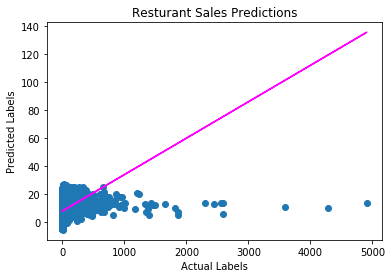

In [39]:
#Visualise Traininign vs actual using scatter plot
%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [40]:
#Evaluation Matrics

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 550.6021964757889
RMSE: 23.464914158713405
R2: 0.026466150353971596


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)


DecisionTreeRegressor() 

|--- feature_6 <= 27.50
|   |--- feature_6 <= 3.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_13 <= 2830.50
|   |   |   |   |--- feature_5 <= 1149.00
|   |   |   |   |   |--- feature_5 <= 1143.00
|   |   |   |   |   |   |--- feature_5 <= 1123.00
|   |   |   |   |   |   |   |--- feature_5 <= 1119.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 53.50
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 1391.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 1464042.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 27
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  1464042.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |--- feature_13 >  1391.50
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 2153.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 29
|   |   |   |   |   |   |   |   |   |   

MSE: 437.31007964422236
RMSE: 20.911960205686658
R2: 0.22678084459154246


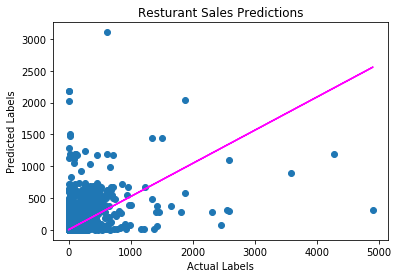

In [63]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 514.5603034322799
RMSE: 22.683921694281167
R2: 0.09019274481320871


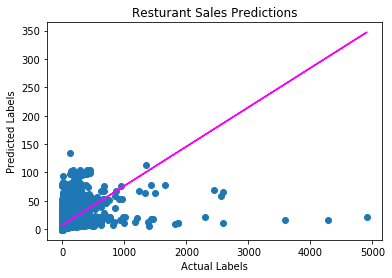

In [41]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 1.0, 'n_estimators': 150} 

GradientBoostingRegressor(learning_rate=1.0, n_estimators=150) 

MSE: 427.6161714396469
RMSE: 20.67888225798597
R2: 0.24392089203944722


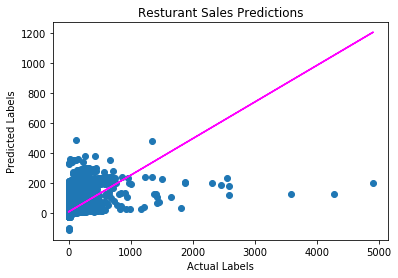

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()